<a href="https://colab.research.google.com/github/bernabe-ortega-tenezaca/mlEjercicio2/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importa la base de datos de diabetes desde mi repositorio

In [1]:
!git clone https://github.com/bernabe-ortega-tenezaca/databases.git

Cloning into 'databases'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 17.00 KiB | 17.00 MiB/s, done.


In [2]:
# Importamos las librerias necesarias para el trabajo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import joblib



In [3]:
#Cargamos el dataset
df = pd.read_csv('/content/databases/DatasetofDiabetes.csv')
print("Primeras filas del dataset:")
print(df.head())


Primeras filas del dataset:
    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


In [4]:
#Hacemos la limpieza de datos:

#Eliminando columnas irrelevantes
df = df.drop(columns=['ID', 'No_Pation'])

# Codificando 'Gender' como numérico
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

# Eliminando duplicados
df = df.drop_duplicates()

# Filtrando solo clases válidas
df = df[df['CLASS'].isin(['N', 'Y'])]

# Eliminando valores nulos
df = df.dropna()


In [5]:
# Revisamos características

# Se crea la columna AGE_BMI
df['AGE_BMI'] = df['AGE'] * df['BMI']

# Se crea la columna  AGE_GROUP
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 30, 50, np.inf], labels=['Young', 'Middle-aged', 'Senior'])
df['AGE_GROUP'] = df['AGE_GROUP'].map({'Young': 0, 'Middle-aged': 1, 'Senior': 2})

# Se codifica la variable objetivo
df['CLASS'] = df['CLASS'].map({'N': 0, 'Y': 1})


In [6]:
# Separamos las variables predictoras
X = df.drop(columns=['CLASS'])
y = df['CLASS']

In [7]:
# Dividimos los datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Entrenamos el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Evaluamos el modelo

y_pred = model.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[ 21   2]
 [  1 133]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.99      0.99      0.99       134

    accuracy                           0.98       157
   macro avg       0.97      0.95      0.96       157
weighted avg       0.98      0.98      0.98       157



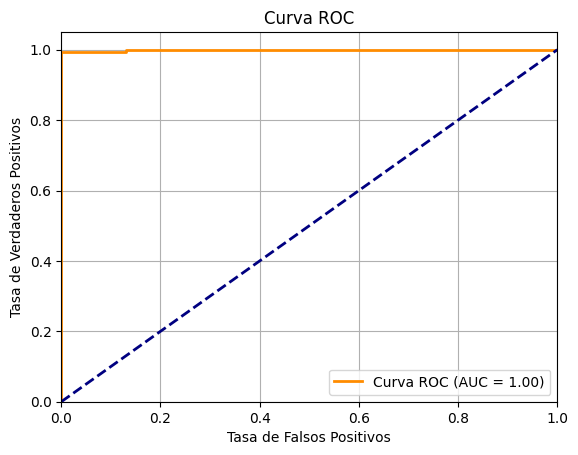

AUC: 0.9990


In [12]:
#Calculamos la curva ROC y AUC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC: {roc_auc:.4f}")


In [13]:
!pip install mlflow --quiet
!pip install pyngrok --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 105.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [14]:
import mlflow
import mlflow.sklearn

In [15]:
mlflow.set_experiment("Prediccion Diabetes")

2025/05/19 00:23:09 INFO mlflow.tracking.fluent: Experiment with name 'Prediccion Diabetes' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/804702594264593594', creation_time=1747614189526, experiment_id='804702594264593594', last_update_time=1747614189526, lifecycle_stage='active', name='Prediccion Diabetes', tags={}>

In [16]:
from google.colab import userdata
ngRokToken = userdata.get('ngrokToken')

In [17]:
# Colocamos la solución en el puerto 9090
get_ipython().system_raw("mlflow ui --port 9090 &")
mlflow.set_tracking_uri("http://localhost:9090")

In [18]:
from pyngrok import ngrok
ngrok.set_auth_token(ngRokToken)

In [19]:
public_url  = ngrok.connect(9090).public_url
print('mlflow UI URL: ', public_url)

mlflow UI URL:  https://ab2e-34-168-107-219.ngrok-free.app


In [23]:
with mlflow.start_run(run_name="Predicción de diabetes"):
    mlflow.sklearn.log_model(model, "model")
    mlflow.log_metric("accuracy", model.score(X_test, y_test))
    mlflow.log_params(model.get_params())
    mlflow.sklearn.log_model(model, "Random Forest Classifier")

2025/05/19 00:31:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/19 00:31:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Predicción de diabetes at: http://localhost:9090/#/experiments/804702594264593594/runs/db9814882b5f42efbadfdf8c7aff74ec
🧪 View experiment at: http://localhost:9090/#/experiments/804702594264593594


Se puede observar el sitio en estado experimental en: https://ab2e-34-168-107-219.ngrok-free.app/#/experiments/804702594264593594/runs/db9814882b5f42efbadfdf8c7aff74ec o seleccionando el experimento diabetes en el siguiente enlace: https://ab2e-34-168-107-219.ngrok-free.app/